In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

####Q1

Implementation of perceptron learning algorithm

In [0]:
# points_mat: nXp matrix of floats
# label: vecotr belongs to {-1,+1}^n
# w_init: number which will be the entries of the initial vector
# report: True if you want to print details of the algo's steps
def perceptron(points_mat,label, w_init=0, report=False):
  w = np.repeat(float(w_init),points_mat.shape[0])
  is_changed = True
  step=0
  while is_changed:
    is_changed = False
    for idx, point in enumerate(points_mat.T):
      step+=1
      if report:
        print("step",step)
        print("w=",w, "x=",point, "prod=",w @ point)
      if np.sign(w @ point) * label[idx] <=0:
        if report:
          print("!= sign", label[idx], "w=",label[idx]*point)
        w += label[idx]*point
        is_changed = True
      elif report:
        print("== sign", label[idx])
  return w

####Q2

In [0]:
# Function for sampling a 2XP matrix and a 1XP vector label
# The label rule is 1 if x1>x2, -1 O.W
def sample_two_dim_data(P):
  points = np.random.uniform(low=-10,high=10, size=(2,P))
  label = np.apply_along_axis(lambda point: np.sign(point[0] - point[1]),
                           axis=0, arr=points)
  return points, label

Sample points and label

In [0]:
mat, la = sample_two_dim_data(P=1000)
data = np.row_stack((mat, la))
blues = data[:,data[2,:] == 1]
reds = data[:,data[2,:] == -1]

Plot the points and colour their label 

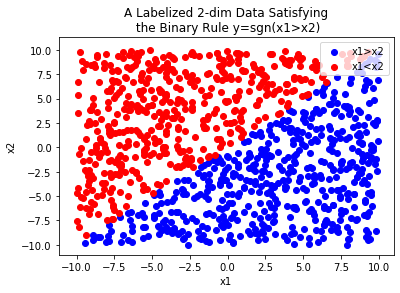

In [0]:
fig, ax = plt.subplots()
ax.scatter(blues[0,:],blues[1,:], c='blue', label = 'x1>x2')
ax.scatter(reds[0,:],reds[1,:], c='red', label = 'x1<x2')
ax.title.set_text("A Labelized 2-dim Data Satisfying\n the Binary Rule y=sgn(x1>x2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.legend()
plt.show()

#### Q3

In [0]:
weights = perceptron(mat,la,w_init=1)

Finding the seperator line by the orthogonal line to the w\
We should find this line by the line equation

In [0]:
sep_slope = -1/(weights[1]/weights[0])
x_base, y_base = (-10,-10)
y_of_x = (10-x_base)*sep_slope + y_base

Plotting with w and the seperator

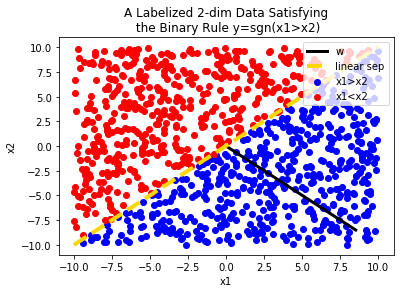

In [0]:
fig, ax = plt.subplots()
ax.scatter(blues[0,:],blues[1,:], c='blue', label = 'x1>x2')
ax.scatter(reds[0,:],reds[1,:], c='red', label = 'x1<x2')
ax.plot([0,(weights/5)[0]],[0,(weights/5)[1]],
        linewidth=3, c="black",label="w") # weights preserves its direction
ax.plot([x_base,10],[y_base,y_of_x], c="gold", linewidth=4, label="linear sep", linestyle="--")
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)
ax.title.set_text("A Labelized 2-dim Data Satisfying\n the Binary Rule y=sgn(x1>x2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.legend()
plt.show()

#### Q4

Generate experiment df

In [0]:
W_opt = np.array([1,-1])
P = np.array([25, 35, 55, 100, 150, 200, 500])
experiment = pd.DataFrame(np.repeat(P,100), columns=['P'])
W_opt = np.array([1,-1]) # the optimal w in our case
experiment[["points","label"]] = pd.DataFrame(experiment['P'].apply(lambda p: sample_two_dim_data(p)).tolist())

In [0]:
def compute_error(points,label):
  w = perceptron(points,label,w_init=1)
  cos = (w @ W_opt)/ (np.linalg.norm(w) * np.linalg.norm(W_opt))
  error = abs(math.degrees(math.acos(cos)))
  return error

In [0]:
experiment['error'] = experiment.apply(lambda row: compute_error(row["points"], row["label"]), axis=1)

In [0]:
means = []
for p in P:
  means.append(experiment.loc[experiment['P']==p, "error"].mean())

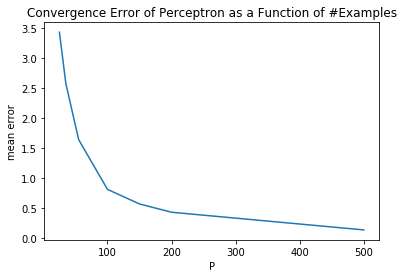

In [0]:
plt.plot(P, means)
plt.title("Convergence Error of Perceptron as a Function of #Examples")
plt.xlabel("P")
plt.ylabel("mean error")
plt.show()